In [ ]:
# Import Library
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
base_dir = '/content/drive/MyDrive/Temp/Dataset'
train_dir = os.path.join(base_dir, 'training')
val_dir = os.path.join(base_dir, 'validation')

In [ ]:
# Pre-processing data dengan image augmentation.
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# kalo g pake augmentasi yg ini
# train_datagen = ImageDataGenerator(rescale=1./255,)

# yg ini klo pake augmentasi
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=40,
                    width_shift_range=0.2,
                    height_shift_range=0.2,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    zoom_range=0.2,
                    fill_mode = 'nearest')
 
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# Mempersiapkan data latih yang akan dipelajari oleh model dengan image data generator.
train_generator = train_datagen.flow_from_directory(
        train_dir,               # direktori data latih
        target_size=(300, 300),  # mengubah resolusi seluruh gambar menjadi 300x300 piksel
        batch_size=10,
        # karena kita merupakan masalah klasifikasi 3 kelas maka menggunakan class_mode = 'categorical'
        class_mode='categorical')
 
validation_generator = test_datagen.flow_from_directory(
        val_dir,                # direktori data validasi
        target_size=(300, 300), # mengubah resolusi seluruh gambar menjadi 300x300 piksel
        batch_size=10,
        # karena kita merupakan masalah klasifikasi 3 kelas maka menggunakan class_mode = 'categorical'
        class_mode='categorical')

Found 120 images belonging to 3 classes.
Found 30 images belonging to 3 classes.


In [ ]:
# Membangun model sequential
MobileNet_MODEL=tf.keras.applications.mobilenet.MobileNet(
    input_shape=(300,300,3),
    include_top=False,
    weights='imagenet')

MobileNet_MODEL.trainable = False
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = tf.keras.layers.Dense(3,activation='Softmax')

model = tf.keras.Sequential([
    MobileNet_MODEL,
    global_average_layer,
    tf.keras.layers.Dense(128, activation='relu'),
    prediction_layer
])

In [ ]:
# Memanggil fungsi compile pada objek model, dan menentukan loss function serta optimizer.
model.summary()
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 9, 9, 1024)       3228864   
 nal)                                                            
                                                                 
 global_average_pooling2d_2   (None, 1024)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_5 (Dense)             (None, 128)               131200    
                                                                 
 dense_4 (Dense)             (None, 3)                 387       
                                                                 
Total params: 3,360,451
Trainable params: 131,587
Non-trainable params: 3,228,864
_________________________________________________________________


In [ ]:
# Latih model dengan model.fit 
history = model.fit(
      train_generator,
      steps_per_epoch=8,       # 80 images = batch_size * steps
      epochs=100,
      validation_data=validation_generator,
      validation_steps=2,      # 20 images = batch_size * steps
      verbose=1,)

Epoch 1/100
8/8 [==============================] - 9s 859ms/step - loss: 0.7720 - accuracy: 0.4625 - val_loss: 0.4176 - val_accuracy: 0.7000
Epoch 2/100
8/8 [==============================] - 6s 741ms/step - loss: 0.3112 - accuracy: 0.8125 - val_loss: 0.3601 - val_accuracy: 0.7500
Epoch 3/100
8/8 [==============================] - 6s 733ms/step - loss: 0.3121 - accuracy: 0.7750 - val_loss: 0.2057 - val_accuracy: 0.9000
Epoch 4/100
8/8 [==============================] - 6s 744ms/step - loss: 0.1857 - accuracy: 0.9000 - val_loss: 0.2345 - val_accuracy: 0.8500
Epoch 5/100
8/8 [==============================] - 6s 738ms/step - loss: 0.1638 - accuracy: 0.9000 - val_loss: 0.1752 - val_accuracy: 0.9000
Epoch 6/100
8/8 [==============================] - 6s 745ms/step - loss: 0.1345 - accuracy: 0.9375 - val_loss: 0.1530 - val_accuracy: 0.9500
Epoch 7/100
8/8 [==============================] - 6s 724ms/step - loss: 0.0981 - accuracy: 0.9750 - val_loss: 0.0964 - val_accuracy: 0.9500
Epoch 8/100
8

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

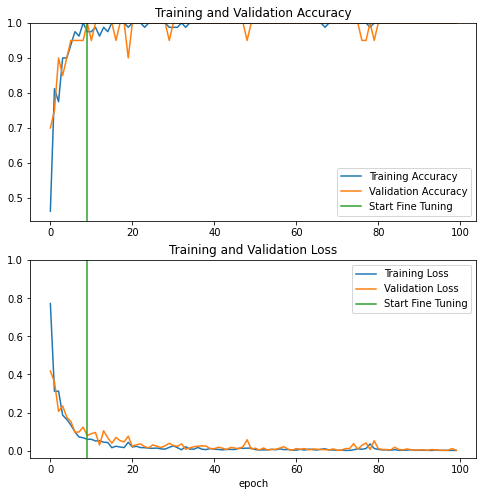

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([min(plt.ylim()), 1])
plt.plot([9,9],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([min(plt.ylim()), 1.0])
plt.plot([9,9],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
model.save('model_spada.h5')